#**Day 7 with Python**
K-nearest neighbors (KNN)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
Accuracy = 0.825


Text(0, 0.5, 'Accuracy')

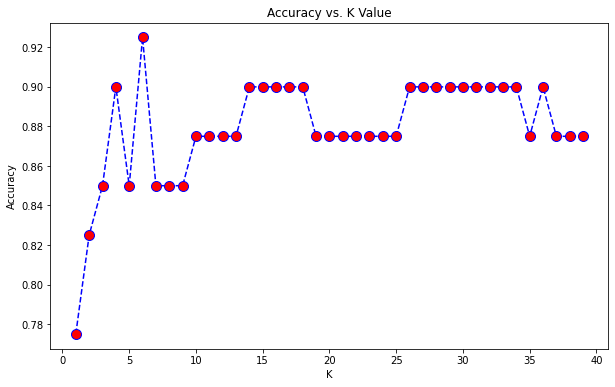

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day7/Social_Network_Ads.csv')

def normalize( X ) :
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  return X

X = data.iloc[:,2:4].values
Y = data.iloc[:,-1].values
X = normalize( X )
m,n = np.shape(X)

s_f = 0.9
n_train = math.floor(s_f * m)
n_test = math.ceil((1-s_f) * m)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

class KNN():
  def __init__( self, K ) :
    self.K = K

  def fit( self, X_train, Y_train ) :  
    self.X_train = X_train
    self.Y_train = Y_train
    self.m_train, self.n_train = X_train.shape

  def predict(self, X_test):
    self.X_test = X_test
    self.m_test, self.n_test = X_test.shape
    Y_predict = np.zeros( self.m_test )
    i = 1
    for i in range( self.m_test ) :
      x = self.X_test[i]
      neighbors = np.zeros( self.K )
      neighbors = self.find_neighbors(x)
      Y_predict[i] = self.vote (neighbors)
    return Y_predict

  def vote(self,neighbors):
    self.n_nei = len(neighbors)
    i=0
    count1 = 0
    count0 = 0
    for i in range (self.n_nei):
      if neighbors[i] == 1 :
        count1 += 1
      else:
        count0 += 1
    if count1>=count0 :
        return 1
    else:
        return 0

  def find_neighbors(self, x):
    euclidean_distances = np.zeros(self.m_train )
    for i in range( self.m_train ) :
      d = self.euclidean( x, self.X_train[i] )  
      euclidean_distances[i] = d
      inds = euclidean_distances.argsort()
      Y_train_sorted = self.Y_train[inds]
    return Y_train_sorted[:self.K]

  def euclidean( self, x, X_train ) :
    return np.sqrt( np.sum( np.square( x - X_train ) ) )

model = KNN(K=2)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(y_pred)

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == Y_test[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

#Find K
Accuracy = []
for i in range(1, 40):
	model = KNN(K=i)
	model.fit(X_train,Y_train)
	y_pred = model.predict(X_test)
	Accuracy.append(np.mean(y_pred == Y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), Accuracy, color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
